In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import json
import zipfile
import urllib.request
import itertools
from sklearn import metrics
from geopy.distance import vincenty
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import os
os.chdir("/Users/Dell/Downloads")
df = pd.read_csv("DV_Trips.csv")
df.head(100)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Hour,Day of Week,Start District,End District,Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,0000ced0-47cf-4fe8-a42d-3e516618cabb,eb1fc8ef-2f9c-4f9d-92a7-b481edf5781c,bicycle,60.0,52.0,10/23/2018 12:30:00,10/23/2018 12:30:00,12/13/2018 03:38:14,12.0,2.0,5,9,13918,13918,2018.0,30.263,-97.756,30.263,-97.755
1,0e72a742-a468-4aa1-b919-538637aa737e,243b973f-f172-4250-9e1f-0f9fea7bf45d,bicycle,715.0,2140.0,07/29/2018 07:00:00,07/29/2018 07:15:00,12/21/2018 12:32:43,19.0,0.0,5,5,13602,12972,2018.0,30.262,-97.759,30.263,-97.770
2,d7bb8cbb-e03f-4715-b713-b0bd85a3a39c,0bd62bc0-ee96-4a1b-95b8-c66b5a8cc833,bicycle,549.0,1947.0,07/29/2018 07:15:00,07/29/2018 07:30:00,12/21/2018 12:32:43,19.0,0.0,9,9,14230,14383,2018.0,30.257,-97.750,30.247,-97.748
3,62a61f17-97d4-4984-b17d-3a2598563338,a6877d88-b3cd-4bc6-941c-8c441760c608,bicycle,765.0,3267.0,08/01/2018 15:00:00,08/01/2018 15:15:00,12/21/2018 12:32:43,15.0,3.0,3,5,15335,13603,2018.0,30.264,-97.734,30.265,-97.761
4,ec791aaf-5179-419e-be08-42ccc770eee4,1858b897-6b46-4ec1-8ce5-c3ceab08437a,bicycle,1261.0,2462.0,07/02/2018 11:00:00,07/02/2018 11:30:00,12/21/2018 12:32:43,11.0,1.0,3,1,15965,14866,2018.0,30.263,-97.725,30.272,-97.741
5,fc046b43-ac0b-4fa5-a20f-3107b1887ba4,c7162240-d27f-4a47-ba3b-18f05042d3fc,bicycle,898.0,2285.0,07/02/2018 11:15:00,07/02/2018 11:30:00,12/21/2018 12:32:43,11.0,1.0,3,1,15965,14866,2018.0,30.263,-97.725,30.272,-97.741
6,dbb2375b-85bf-4a48-bfd0-8046b6cbda25,243a374e-2faa-48d8-a4f3-ce2f351fcba4,bicycle,1751.0,5488.0,07/08/2018 14:45:00,07/08/2018 15:15:00,12/21/2018 12:32:43,14.0,0.0,9,8,15800,13289,2018.0,30.245,-97.726,30.267,-97.765
7,000f8e87-5ab5-4a19-98f6-5f33260fc1bc,1ae4f129-d5c1-4d70-b3e0-641db60aebac,bicycle,1920.0,3039.0,09/02/2018 15:00:00,09/02/2018 15:30:00,12/13/2018 03:38:14,15.0,0.0,9,9,14861,14706,2018.0,30.260,-97.741,30.264,-97.744
8,00146bee-9621-4e32-8c4a-64f33f215a2d,07674c49-c3dd-4d9b-a5cd-9f957071f220,bicycle,2220.0,789.0,09/02/2018 21:30:00,09/02/2018 22:15:00,12/12/2018,21.0,0.0,9,9,13916,13916,2018.0,30.260,-97.755,30.260,-97.755
9,001d8a4e-1a4a-4248-8869-0c756dd7cf53,5fa79506-7c9f-4f65-9941-dcfdbde33da1,bicycle,51.0,89.0,10/23/2018 02:00:00,10/23/2018 02:00:00,12/12/2018,14.0,2.0,8,8,12973,12973,2018.0,30.264,-97.771,30.264,-97.770


# PreProcessing of Data (Missing Value and Anamoly detection)

In [5]:
df.shape

(5718, 19)

In [7]:
df.isnull().sum()

ID                      0
Device ID               0
Vehicle Type            1
Trip Duration           1
Trip Distance           1
Start Time              1
End Time                0
Modified Date           0
Hour                    1
Day of Week             1
Start District          0
End District            0
Origin Cell ID          1
Destination Cell ID     1
Year                    1
Start Latitude         50
Start Longitude        50
End Latitude           12
End Longitude          12
dtype: int64

In [8]:
df = df[np.isfinite(df['Start Latitude'])]
df = df[np.isfinite(df['Start Longitude'])]

ValueError: num must be 1 <= num <= 18, not 19

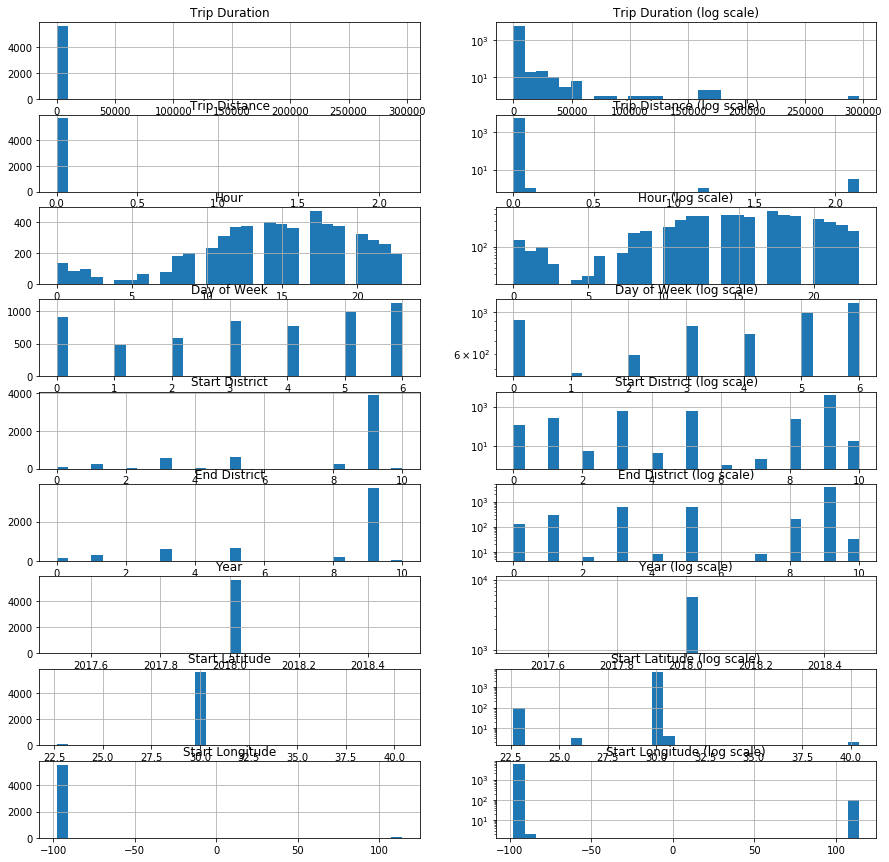

In [9]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15,15))

i = 1
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col)
        i += 1
        ax = plt.subplot(9, 2, i)
        df[col].hist(bins=30)
        ax.set_title(col+" (log scale)")
        ax.set_yscale('log')
        i += 1

fig.tight_layout()
plt.show()

In [10]:
x1 = len(df['Origin Cell ID'].unique())
y1 = len(df[['Origin Cell ID', 'Start District']].drop_duplicates())
x2 = len(df['Destination Cell ID'].unique())
y2 = len(df[['Destination Cell ID', 'End District']].drop_duplicates())

x1 == y1 and x2 == y2

False

In [11]:
x1 = len(df['Origin Cell ID'].unique())
y2 = len(df[['Origin Cell ID', 'Start Latitude']].drop_duplicates())
x2 = len(df['Destination Cell ID'].unique())
y2 = len(df[['Destination Cell ID', 'End Latitude']].drop_duplicates())

x1 == y1 and x2 == y2

False

In [12]:
x1 = len(df['Origin Cell ID'].unique())
y2 = len(df[['Origin Cell ID', 'Start Longitude']].drop_duplicates())
x2 = len(df['Destination Cell ID'].unique())
y2 = len(df[['Destination Cell ID', 'End Longitude']].drop_duplicates())

x1 == y1 and x2 == y2

False

In [13]:
t1 = df[['Origin Cell ID','Start District', 'Start Latitude', 'Start Longitude']] \
            .drop_duplicates().rename(columns = {'Origin Cell ID':'station id', \
                                                 'Start District':'start district', \
                                                 'Start Latitude':'station latitude', 
                                                 'Start Longitude': 'station longitude'})
t2 = df[['Destination Cell ID','End District', 'End Latitude', 'End Longitude']] \
            .drop_duplicates().rename(columns = {'Destination Cell ID':'station id', \
                                                 'End District':'end district', \
                                                 'End Latitude':'station latitude', 
                                                 'End Longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

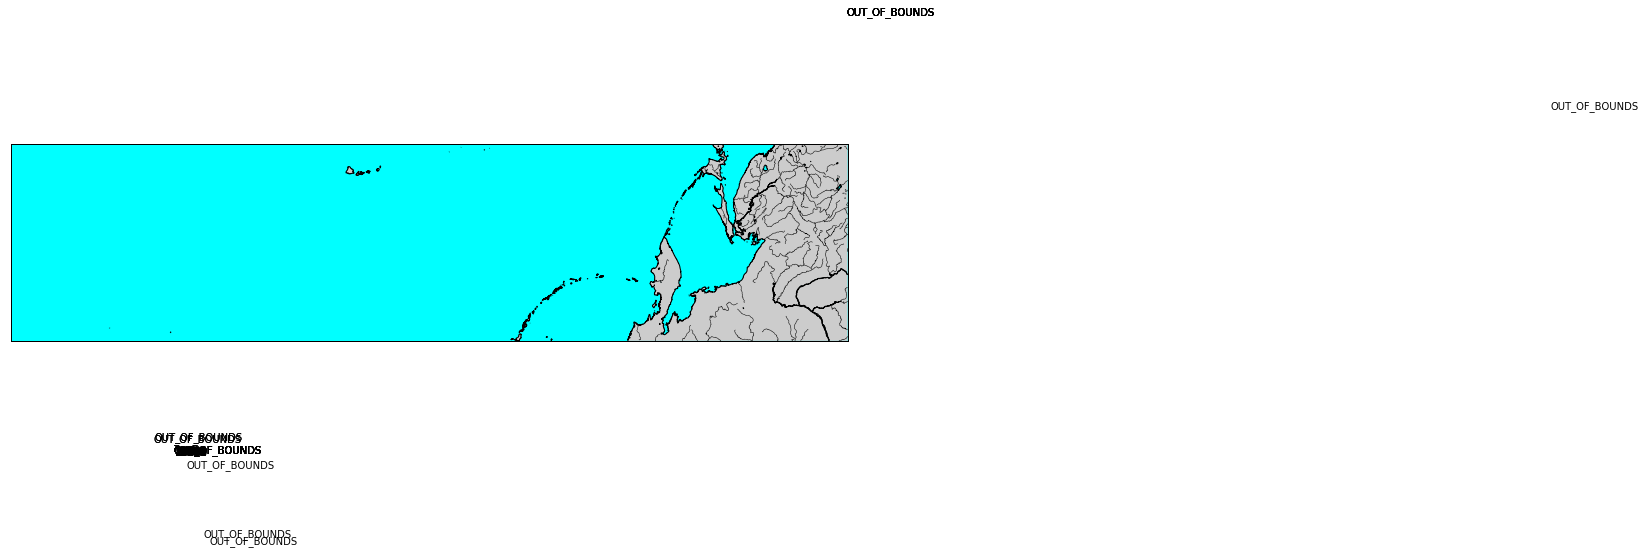

In [14]:
# Initialize plots
fig, ax = plt.subplots(figsize=(15,15))

# determine range to print based on min, max lat and lon of the data
lat = list(df_loc['station latitude'])
lon = list(df_loc['station longitude'])
text = list(df_loc['station id'])
margin = 1 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawrivers()

# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(df_loc.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()

In [15]:
# format example: 2017-07-01 00:00:00
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %H:%M:%S')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5668 entries, 0 to 5717
Data columns (total 19 columns):
ID                     5668 non-null object
Device ID              5668 non-null object
Vehicle Type           5668 non-null object
Trip Duration          5668 non-null float64
Trip Distance          5668 non-null float64
Start Time             5668 non-null datetime64[ns]
End Time               5668 non-null datetime64[ns]
Modified Date          5668 non-null object
Hour                   5668 non-null float64
Day of Week            5668 non-null float64
Start District         5668 non-null int64
End District           5668 non-null int64
Origin Cell ID         5668 non-null object
Destination Cell ID    5668 non-null object
Year                   5668 non-null float64
Start Latitude         5668 non-null float64
Start Longitude        5668 non-null float64
End Latitude           5657 non-null float64
End Longitude          5657 non-null float64
dtypes: datetime64[ns](2), float64

In [16]:
def gen_time_segment(dt):
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}/{}/{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

df['start_seg'] = [gen_time_segment(dt) for dt in df['Start Time']]
df['stop_seg'] = [gen_time_segment(dt) for dt in df['End Time']]
df[['Origin Cell ID', 'Start Time', 'start_seg', 'Destination Cell ID','End Time','stop_seg']].head()

,Origin Cell ID,Start Time,start_seg,Destination Cell ID,End Time,stop_seg
0,13918,2018-10-23 12:30:00,2018/10/23 12:30,13918,2018-10-23 12:30:00,2018/10/23 12:30
1,13602,2018-07-29 07:00:00,2018/7/29 7:00,12972,2018-07-29 07:15:00,2018/7/29 7:00
2,14230,2018-07-29 07:15:00,2018/7/29 7:00,14383,2018-07-29 07:30:00,2018/7/29 7:30
3,15335,2018-08-01 15:00:00,2018/8/1 15:00,13603,2018-08-01 15:15:00,2018/8/1 15:00
4,15965,2018-07-02 11:00:00,2018/7/2 11:00,14866,2018-07-02 11:30:00,2018/7/2 11:30


In [17]:
inflow = df[['Destination Cell ID', 'stop_seg']] \
            .groupby(['Destination Cell ID', 'stop_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'Destination Cell ID':'station id','stop_seg':'time', 'counts':'in_flow_count'})

In [18]:
outflow = df[['Origin Cell ID', 'start_seg']] \
            .groupby(['Origin Cell ID', 'start_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'Origin Cell ID':'station id','start_seg':'time', 'counts':'out_flow_count'})

In [19]:
station_id_list = list(df_loc['station id'])

# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2018/10/23 00:00:00", "2018/10/23 23:05:00", freq="5min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
dat = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
dat['time'] = pd.to_datetime(dat['time'], format='%Y/%m/%d %H:%M')
dat = dat.merge(template, on=["station id", "time"], how="right").fillna(0)
dat.head()


,station id,time,in_flow_count,out_flow_count
0,11237,2018-10-23 07:30:00,1.0,0.0
1,11237,2018-10-23 07:30:00,1.0,0.0
2,12973,2018-10-23 01:00:00,1.0,1.0
3,12973,2018-10-23 01:00:00,1.0,1.0
4,12973,2018-10-23 01:00:00,1.0,1.0


In [20]:
print("{} stations are found in this dataset.".format(len(station_id_list)))

2971 stations are found in this dataset.


In [21]:
# Create dictionaries for station latitude/longitude
lat_dic = {}
lon_dic = {}
for index, row in df_loc.iterrows():
    lat_dic[row['station id']] = row['station latitude']
    lon_dic[row['station id']] = row['station longitude']

# Generate combinations of pairs of station
c = itertools.combinations(station_id_list, 2)

# Calculate the averge distance of pairs of stations
dist = 0
count = 0
for stn1, stn2 in c:
        dist += vincenty((lat_dic[stn1], lon_dic[stn1]), (lat_dic[stn2], lon_dic[stn2])).meters
        count += 1
print("The average distance between different stations is {} (meters)".format(dist/count))

The average distance between different stations is 12485.7531509071 (meters)


In [22]:
# Split the dataframe into weekdays information & weekends information
df_weekdays = df[df['Start Time'].dt.dayofweek < 5]
df_weekends = df[df['Start Time'].dt.dayofweek >= 5]

# Count and sort station pair frequencies
stn_pair_weekdays = df_weekdays[['Origin Cell ID', 'Destination Cell ID']] \
                    .groupby(['Origin Cell ID', 'Destination Cell ID']) \
                    .size().reset_index(name='counts') \
                    .set_index(['Origin Cell ID', 'Destination Cell ID']) \
                    .sort_values(by='counts', ascending=False)
stn_pair_weekends = df_weekends[['Origin Cell ID', 'Destination Cell ID']] \
                    .groupby(['Origin Cell ID', 'Destination Cell ID']) \
                    .size().reset_index(name='counts') \
                    .set_index(['Origin Cell ID', 'Destination Cell ID']) \
                    .sort_values(by='counts', ascending=False)
            
# Find the top 3 station pairs for weekday & weekend
top_weekday_pair = list(stn_pair_weekdays.head(3).index)
top_weekend_pair = list(stn_pair_weekends.head(3).index)

# Print out the result
print("The top 3 frequent stations pairs in weekdays are: {}, {}, and {}.".format(*top_weekday_pair))
print("The top 3 frequent stations pairs in weekends are: {}, {}, and {}.".format(*top_weekend_pair))

The top 3 frequent stations pairs in weekdays are: ('OUT_OF_BOUNDS', 'OUT_OF_BOUNDS'), ('14389', '14389'), and ('12973', '12973').
The top 3 frequent stations pairs in weekends are: ('14389', '14389'), ('15021', '15021'), and ('14865', '14865').


In [23]:
# Sort the average in/out flow count of each station
average_inflow = dat[['station id', 'in_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='in_flow_count', ascending=False)
average_outflow = dat[['station id', 'out_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='out_flow_count', ascending=False)
            
# List the top 3 stations
top_inflow = list(average_inflow.head(3).index)
top_outflow = list(average_outflow.head(3).index)

# Print out the result
print("The top 3 stations with highest outflow are: {}, {}, and {}".format(*top_outflow))
print("The top 3 stations with highest inflow are: {}, {}, and {}".format(*top_inflow))

The top 3 stations with highest outflow are: 12973, 13918, and OUT_OF_BOUNDS
The top 3 stations with highest inflow are: 12973, OUT_OF_BOUNDS, and 14075


In [24]:
# Sum up in/out flow at each time station
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']

# Calculate and sort the average flow count for each station
average_flow = dat[['station id', 'flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='flow_count', ascending=False)
            
# Find the top 1 station
top_flow = list(average_inflow.head(1).index)

# Print out the result
print("The most popular station is: {}".format(*top_outflow))

The most popular station is: 12973


In [25]:
def gen_time_group(dt):
    if dt.day <= 10:
        return "Early-July"
    elif dt.day <= 20:
        return "Mid-July"
    else:
        return "Late-July"

In [26]:
# Calculate and sort the average flow count for each station
flow = dat[['station id', 'time', 'flow_count']] 

# Create time group
flow['time_group'] = [gen_time_group(dt) for dt in flow['time']]

# Summarise flow count according to time group
flow = flow.groupby(["station id", "time_group"], as_index=False) \
            .agg({'flow_count': 'sum'})

# Add latitude/logitude columns
flow['latitude'] = [lat_dic[x] for x in flow['station id']]
flow['longitude'] = [lon_dic[x] for x in flow['station id']]

flow.head()

,station id,time_group,flow_count,latitude,longitude
0,10923,Late-July,0.0,30.258,-97.801
1,11229,Late-July,0.0,30.236,-97.796
2,11237,Late-July,4.0,30.255,-97.797
3,11399,Late-July,0.0,30.267,-97.795
4,11545,Late-July,0.0,30.239,-97.791


In [27]:
def plot_stations_map(ax, stns, noText=False):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['latitude'])
    lon = list(stns['longitude'])
    siz = [(2)**(x/1000) for x in stns['flow_count']]
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'f',)

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()

    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)

    # plot points as red dots
    if noText:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6, s=1)
        return
    else:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.3, s=siz)
    
    # annotate popular stations
    for i in range(len(siz)):
        if siz[i] >= 2**6:
            plt.text(lons[i], lats[i], text[i])

ValueError: min() arg is an empty sequence

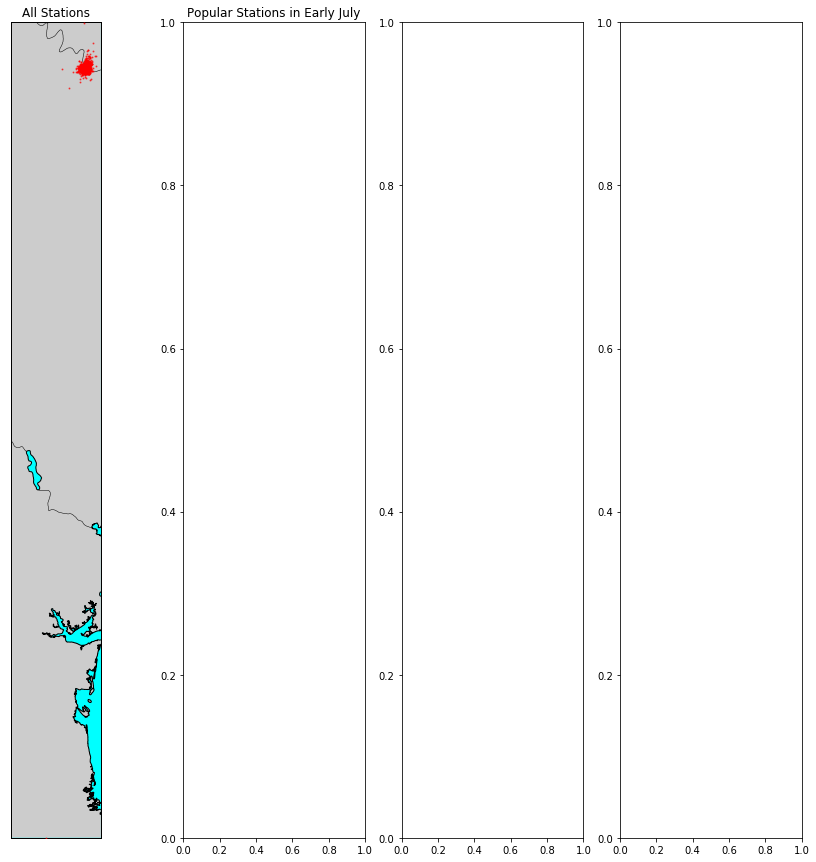

In [28]:
pop_flow = flow[flow['flow_count'] > 1]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
ax = plt.subplot(1, 4, 1)
ax.set_title("All Stations")
plot_stations_map(ax, flow, noText=True)
ax = plt.subplot(1, 4, 2)
ax.set_title("Popular Stations in Early July")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Early-July"])
ax = plt.subplot(1, 4, 3)
ax.set_title("Popular Stations in Mid July")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Mid-July"])
ax = plt.subplot(1, 4, 4)
ax.set_title("Popular Stations in Late July")
plot_stations_map(ax, pop_flow[pop_flow['time_group'] == "Late-July"])